In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('Resources/Data/scaled_data.csv')
data.head()

,Unnamed: 0,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Happiness (Dystopia),Beer_Servings,...,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling
0,0,1.000000,0.929138,0.979132,0.936153,0.973512,-0.106092,0.208901,1.0,0.699468,...,0.0,0.979798,0.979798,0.010753,0.075068,0.021225,0.033708,0.029304,0.941983,0.833333
1,1,0.979113,0.940905,0.980836,0.942685,0.975842,0.118077,0.180090,1.0,0.595745,...,0.0,0.939394,0.939394,0.010753,0.093974,0.022015,0.041199,0.032967,0.973629,0.941176
2,2,0.968138,0.958889,0.967350,0.964818,0.944962,0.188903,0.324640,1.0,0.492021,...,0.0,0.979798,0.979798,0.010753,0.158959,0.032082,0.014981,0.010989,0.989451,0.784314
3,3,0.961043,0.940779,1.000000,0.950464,0.973224,0.440450,0.760711,1.0,0.619681,...,0.0,0.929293,0.929293,0.010753,0.101397,0.000131,0.037453,0.032967,0.969409,0.931373
4,4,0.958930,0.968310,0.977240,0.953078,0.980259,0.239952,0.281341,1.0,0.449468,...,0.0,0.959596,0.959596,0.010753,0.131824,0.002010,0.029963,0.025641,1.000000,0.867647


In [3]:
data.rename(columns = {'Unnamed: 0':'country_id'}, inplace = True)
data.head()

,country_id,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Happiness (Dystopia),Beer_Servings,...,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling
0,0,1.000000,0.929138,0.979132,0.936153,0.973512,-0.106092,0.208901,1.0,0.699468,...,0.0,0.979798,0.979798,0.010753,0.075068,0.021225,0.033708,0.029304,0.941983,0.833333
1,1,0.979113,0.940905,0.980836,0.942685,0.975842,0.118077,0.180090,1.0,0.595745,...,0.0,0.939394,0.939394,0.010753,0.093974,0.022015,0.041199,0.032967,0.973629,0.941176
2,2,0.968138,0.958889,0.967350,0.964818,0.944962,0.188903,0.324640,1.0,0.492021,...,0.0,0.979798,0.979798,0.010753,0.158959,0.032082,0.014981,0.010989,0.989451,0.784314
3,3,0.961043,0.940779,1.000000,0.950464,0.973224,0.440450,0.760711,1.0,0.619681,...,0.0,0.929293,0.929293,0.010753,0.101397,0.000131,0.037453,0.032967,0.969409,0.931373
4,4,0.958930,0.968310,0.977240,0.953078,0.980259,0.239952,0.281341,1.0,0.449468,...,0.0,0.959596,0.959596,0.010753,0.131824,0.002010,0.029963,0.025641,1.000000,0.867647


In [4]:
data.columns

Index(['country_id', 'Happiness_Score', 'GDP', 'Social_Support',
       'Life_Expectancy (Happiness)', 'Freedom_Score', 'Generosity',
       'Corruption_Score', 'Happiness (Dystopia)', 'Beer_Servings',
       'Spirit_Servings', 'Wine_Servings', 'Total_L_Pure_Alcohol',
       'Life_Expectancy (LED)', 'Adult_Mortality', 'infantdeaths',
       'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP.1',
       'Population', 'thinness1-19years', 'thinness5-9years', 'HDI',
       'Schooling'],
      dtype='object')

In [5]:
 # Assign the data to X and y
X = data[[
        'GDP', 'Social_Support','Life_Expectancy (Happiness)', 
        'Freedom_Score', 'Generosity','Corruption_Score',
        'Beer_Servings','Spirit_Servings', 'Wine_Servings', 
        'Adult_Mortality', 'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 
    'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 
       'Population', 'thinness1-19years', 'Schooling'
#     'Total_L_Pure_Alcohol'
]]
y = data['Happiness_Score'].values.reshape(-1, 1)
print(X.shape, y.shape)

(155, 21) (155, 1)


In [6]:
 # Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [7]:
 # Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [8]:
 # Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
training_score=round(training_score,2)
testing_score =round(testing_score,2)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.82
Testing Score: 0.72


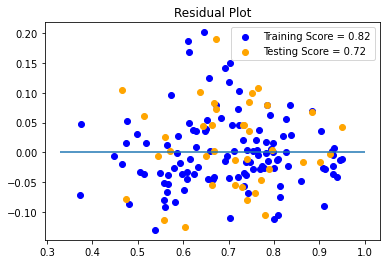

In [9]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label=(f'Training Score = {training_score}'))
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label=(f'Testing Score = {testing_score}'))
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.savefig('Resources/Images/residual_plot.png')

In [10]:
coef = model.coef_
coef

array([[ 0.40055208,  0.19061366, -0.06586495,  0.26003194,  0.0639136 ,
        -0.03027194,  0.07751287, -0.05651444,  0.01640692, -0.1009419 ,
        -0.09495008, -0.01366397, -0.22259796,  0.01519389,  0.25362416,
        -0.11217846,  0.05280698, -0.15989844, -0.16316671, -0.25376347,
        -0.00871324]])

In [11]:
variables = X.columns
variables

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Generosity', 'Corruption_Score', 'Beer_Servings', 'Spirit_Servings',
       'Wine_Servings', 'Adult_Mortality', 'GDP_Health_Gov_Expenditure (%)',
       'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio',
       'Diphtheria', 'HIV/AIDS', 'Population', 'thinness1-19years',
       'Schooling'],
      dtype='object')

In [12]:
# create df comparing variables and coefficient values
coef_df = pd.DataFrame({
    'variables':variables,
    'coefficient':coef[0]
    
})
coef_df=coef_df.sort_values(by=['coefficient'],ascending=False)
coef_df=coef_df.set_index('variables').sort_values(by=['coefficient'],ascending=False)
coef_df

,coefficient
variables,
GDP,0.400552
Freedom_Score,0.260032
under-fivedeaths,0.253624
Social_Support,0.190614
Beer_Servings,0.077513
Generosity,0.063914
Diphtheria,0.052807
Wine_Servings,0.016407
BMI,0.015194


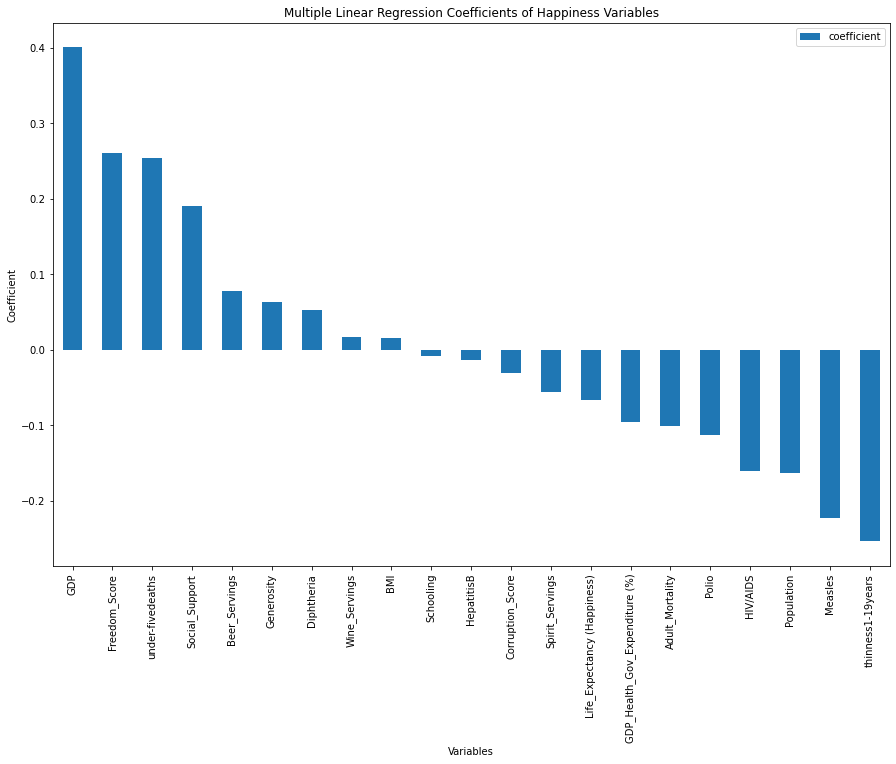

In [13]:
# plot coefficient size
coef_df.plot(kind="bar", figsize=(15,10))
plt.xlabel('Variables')
plt.ylabel('Coefficient')
plt.title('Multiple Linear Regression Coefficients of Happiness Variables')
plt.savefig('Resources/Images/coefficient_bar.png')

In [14]:
# Coefficients. In simple or multiple linear regression, the size of the coefficient for each independent variable 
# gives you the size of the effect that variable is having on your dependent variable, and the sign on the coefficient 
# (positive or negative) gives you the direction of the effect.